<a href="https://colab.research.google.com/github/sriram20038/Identifying_Hidden_Patterns_from_Customer_Purchases/blob/master/Identifying_Hidden_Patterns_from_Customer_Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

openpyxl libary  is used to read and write in excel files

In [1]:
!pip install openpyxl

We imported the dataset stored in dataframe

In [10]:
import pandas as pd



file_path = '/content/Assignment-1_Data (1).xlsx'
data = pd.read_excel(file_path)


seeing first 10 rows of the dataset

In [11]:
from IPython.display import display

# Display the first 10 rows
display(data.head(10))

print(data.shape)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


(522064, 7)


reveoming duplicate rows from datset ,
we remove : 5266 rows

In [12]:
data = data.drop_duplicates()
print(data.shape)

(516778, 7)


Here we considerd the rows with quantity > 0 and price > 0, we remove :2508 rows

In [13]:
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]
print(data.shape)

(514270, 7)


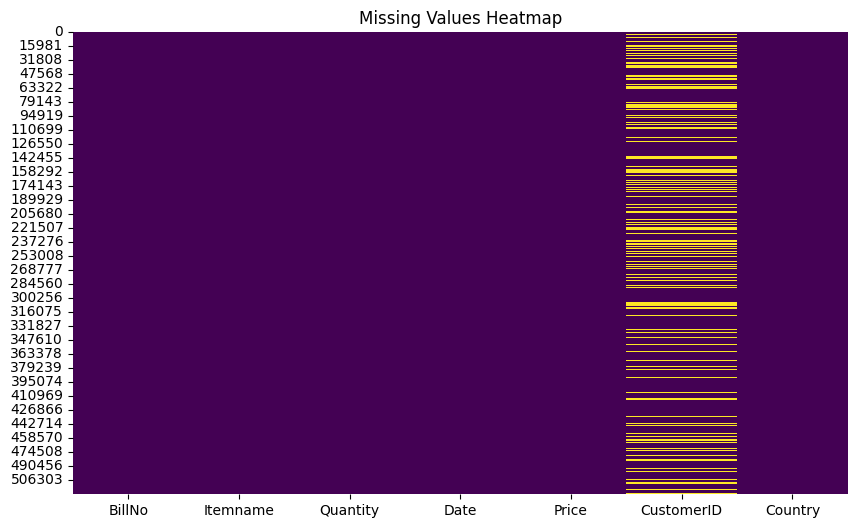

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [20]:
# Count missing values in each column
missing_values_count = data.isnull().sum()
print("Missing values per column:")
print(missing_values_count)


Missing values per column:
BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    131497
Country            0
dtype: int64


In [21]:
# Drop rows with any missing values
data = data.dropna()
print("Data after dropping rows with missing values:")
print(data)


Data after dropping rows with missing values:
        BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0

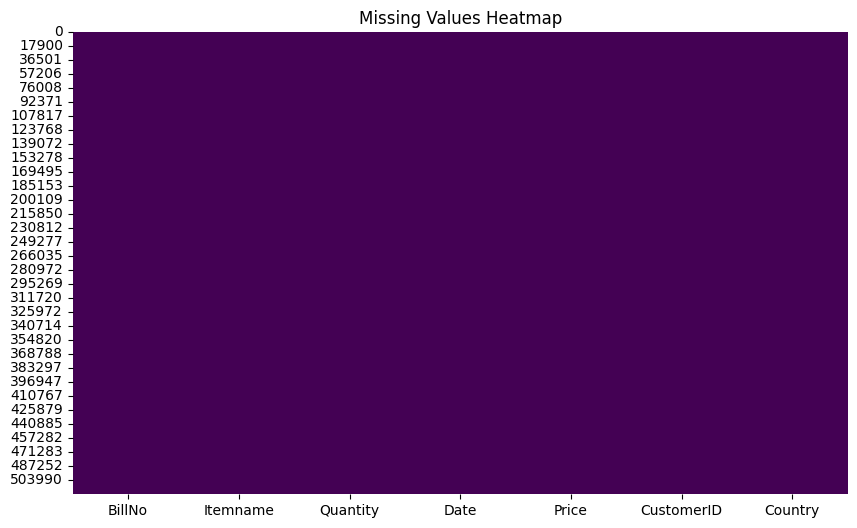

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Calculate transaction sizes
transaction_sizes = df['transactions'].apply(len)

# Histogram of transaction sizes
plt.figure(figsize=(10, 6))
plt.hist(transaction_sizes, bins=20, color='skyblue', edgecolor='black')
plt.title('Transaction Size Distribution')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.show()


In [24]:
data.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

Top 10 most frequently purchased items:
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    1964
REGENCY CAKESTAND 3 TIER              1634
JUMBO BAG RED RETROSPOT               1588
ASSORTED COLOUR BIRD ORNAMENT         1378
PARTY BUNTING                         1361
LUNCH BAG RED RETROSPOT               1281
SET OF 3 CAKE TINS PANTRY DESIGN      1118
LUNCH BAG  BLACK SKULL.               1065
POSTAGE                               1043
PACK OF 72 RETROSPOT CAKE CASES       1013
Name: count, dtype: int64


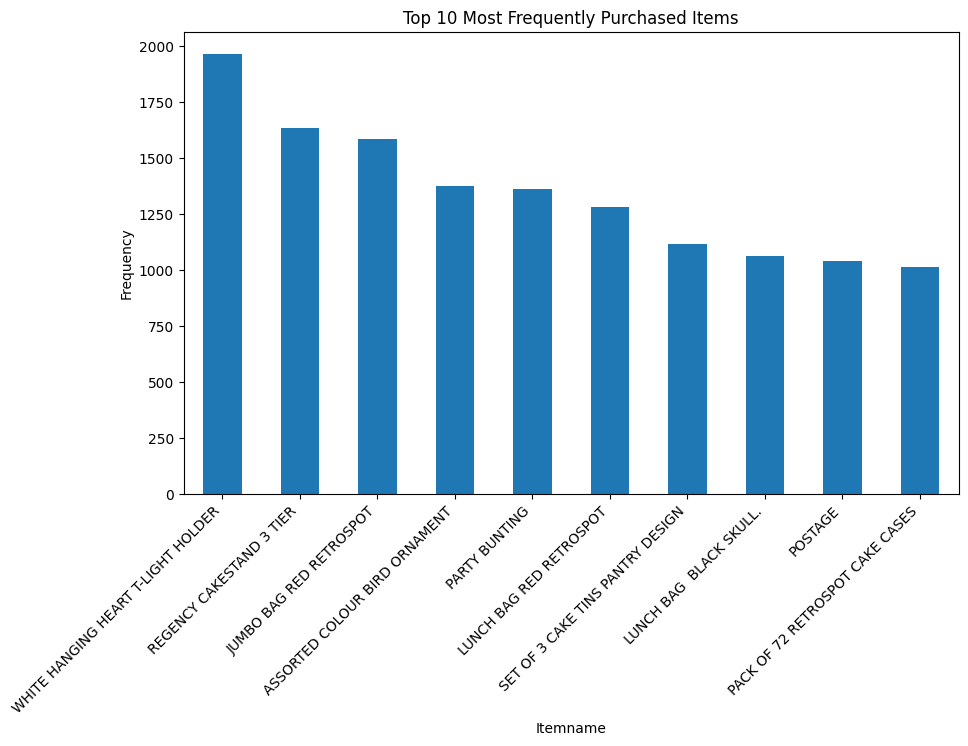

In [28]:
# Top 10 most frequently purchased items
top_products = data['Itemname'].value_counts().head(10)
print("Top 10 most frequently purchased items:\n", top_products)

# Visualization
import matplotlib.pyplot as plt

top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Itemname')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Transaction size summary:
 count    18159.000000
mean        20.805276
std         23.805035
min          1.000000
25%          6.000000
50%         15.000000
75%         27.000000
max        541.000000
Name: Itemname, dtype: float64


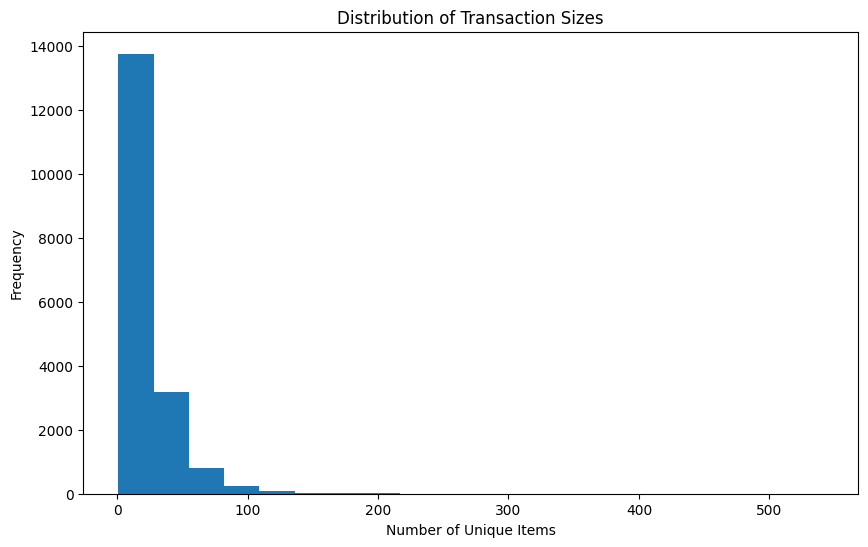

In [29]:
# Number of unique items per transaction
transaction_size = data.groupby('BillNo')['Itemname'].nunique()

# Summary statistics of transaction sizes
print("Transaction size summary:\n", transaction_size.describe())

# Visualization
transaction_size.plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Unique Items')
plt.ylabel('Frequency')
plt.show()


<ipython-input-30-a2e2110ae860>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = data.set_index('Date').resample('M')['Quantity'].sum()


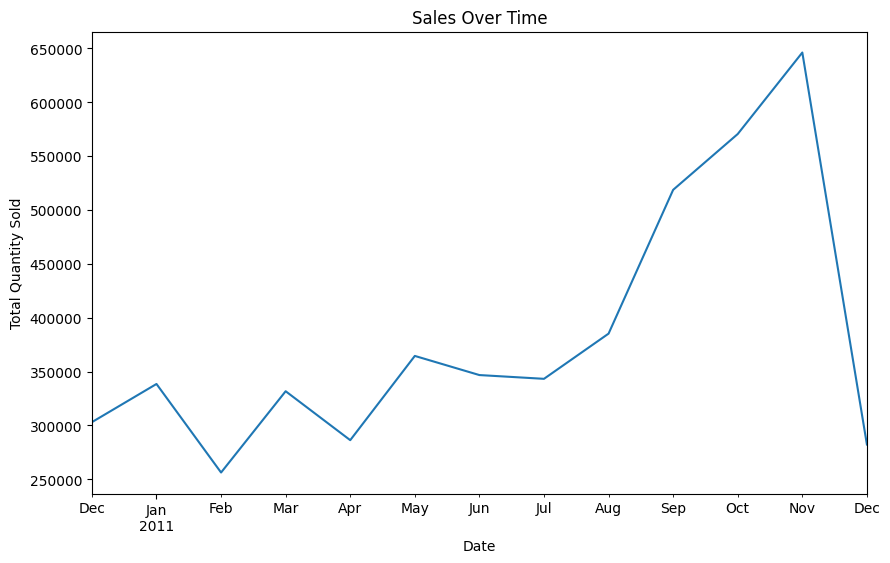

In [30]:
# Sales trends over time
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
sales_over_time = data.set_index('Date').resample('M')['Quantity'].sum()

# Visualization
sales_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()


In this we find how many different countries data is there in the dataset

In [31]:
# Count the number of unique countries in the dataset
unique_countries = data['Country'].nunique()

# Display the number of unique countries
print(f"Number of unique countries: {unique_countries}")


Number of unique countries: 29


here we find number of rows realted to which country

In [32]:
unique_countries = data['Country'].nunique()
country_counts = data['Country'].value_counts()

print(f"Number of unique countries: {unique_countries}")
print("Number of rows for each country:")
print(country_counts)


Number of unique countries: 29
Number of rows for each country:
Country
United Kingdom          349162
Germany                   9025
France                    8326
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Sweden                     450
Austria                    398
Poland                     330
Japan                      321
Israel                     244
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     17
Saudi Arabia                 9
Name: count, dtype: int64


The command pip install mlxtend is used to install the mlxtend library in Python. mlxtend (Machine Learning Extensions) is a library that provides additional tools and utilities for data science and machine learning tasks, which are not available in the main scikit-learn library. It includes modules for frequent pattern mining (like Apriori and FP-Growth), model evaluation, data preprocessing, and more. This library is particularly useful for tasks such as generating association rules and finding frequent itemsets.

In [33]:
!pip install mlxtend

In [34]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

we considered the dataset of sales belogs to United Kingdom

In [35]:
data1 = data[data['Country'] == 'United Kingdom']
data1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


we make the dataset in format of billing

In [36]:
# Convert the dataset into the appropriate format for the Apriori algorithm
basket = data1.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

# Convert quantities to binary (0 or 1) for the algorithm
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Check the first few rows of the transformed dataset
basket.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-eb39d84a4b6a>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


here we use Apriori alogorithm to find Associations, but it take so much time and space

In [ ]:
# Apply Apriori with a lower minimum support
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules with a lower minimum confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules=rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
display(rules.head(10))

print(rules.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
136,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011432,0.039181,0.011155,0.975728,24.903181,0.010707,39.585748,0.970945
525,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038959,0.051723,0.031966,0.820513,15.863541,0.029951,5.283257,0.974945
628,(HERB MARKER MINT),(HERB MARKER BASIL),0.012931,0.012875,0.011210,0.866953,67.334579,0.011044,7.419357,0.998054
629,(HERB MARKER BASIL),(HERB MARKER MINT),0.012875,0.012931,0.011210,0.870690,67.334579,0.011044,7.633335,0.997998
630,(HERB MARKER BASIL),(HERB MARKER PARSLEY),0.012875,0.012653,0.011266,0.875000,69.151864,0.011103,7.898774,0.998394
631,(HERB MARKER PARSLEY),(HERB MARKER BASIL),0.012653,0.012875,0.011266,0.890351,69.151864,0.011103,9.002577,0.998169
632,(HERB MARKER ROSEMARY),(HERB MARKER BASIL),0.012820,0.012875,0.011432,0.891775,69.262465,0.011267,9.121032,0.998361
633,(HERB MARKER BASIL),(HERB MARKER ROSEMARY),0.012875,0.012820,0.011432,0.887931,69.262465,0.011267,8.808685,0.998417
634,(HERB MARKER BASIL),(HERB MARKER THYME),0.012875,0.012764,0.011266,0.875000,68.550543,0.011102,7.897886,0.998265
635,(HERB MARKER THYME),(HERB MARKER BASIL),0.012764,0.012875,0.011266,0.882609,68.550543,0.011102,8.408840,0.998153


(177, 10)


here we seeing the strongest association rules , by sorting upon lift and confidence

In [ ]:
# Sort the rules by lift, and then by confidence
strongest_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Display the top rule
display(strongest_rules.head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2644,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.011488,0.012764,0.010933,0.951691,74.558769,0.010786,20.435779,0.998053
2649,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",0.012764,0.011488,0.010933,0.856522,74.558769,0.010786,6.889630,0.999344
2640,"(HERB MARKER MINT, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.011099,0.012820,0.010600,0.955000,74.494134,0.010458,21.937338,0.997649
2641,(HERB MARKER ROSEMARY),"(HERB MARKER MINT, HERB MARKER THYME)",0.012820,0.011099,0.010600,0.826840,74.494134,0.010458,5.710901,0.999388
2633,"(HERB MARKER MINT, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.011099,0.012653,0.010433,0.940000,74.288860,0.010293,16.455778,0.997612
2636,(HERB MARKER PARSLEY),"(HERB MARKER MINT, HERB MARKER THYME)",0.012653,0.011099,0.010433,0.824561,74.288860,0.010293,5.636733,0.999182
2646,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.011488,0.012820,0.010933,0.951691,74.236004,0.010786,20.434630,0.997994
2647,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER THYME)",0.012820,0.011488,0.010933,0.852814,74.236004,0.010786,6.716068,0.999341
2622,"(HERB MARKER BASIL, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.011266,0.012820,0.010711,0.950739,74.161751,0.010566,20.039758,0.997757
2623,(HERB MARKER ROSEMARY),"(HERB MARKER BASIL, HERB MARKER THYME)",0.012820,0.011266,0.010711,0.835498,74.161751,0.010566,6.010463,0.999327


2. FP-Growth (Frequent Pattern Growth):
The FP-Growth algorithm addresses the inefficiencies of Apriori by using a more compact data structure called the FP-tree.

In [38]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Start with FP-Growth for an initial fast pass
frequent_itemsets1 = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Further refine with Apriori if needed
# frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules2 = rules2[(rules2['lift'] >= 6) & (rules2['confidence'] >= 0.8)]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
display(rules2.head(10))

print(rules2.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
136,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011432,0.039181,0.011155,0.975728,24.903181,0.010707,39.585748,0.970945
525,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038959,0.051723,0.031966,0.820513,15.863541,0.029951,5.283257,0.974945
628,(HERB MARKER MINT),(HERB MARKER BASIL),0.012931,0.012875,0.011210,0.866953,67.334579,0.011044,7.419357,0.998054
629,(HERB MARKER BASIL),(HERB MARKER MINT),0.012875,0.012931,0.011210,0.870690,67.334579,0.011044,7.633335,0.997998
630,(HERB MARKER BASIL),(HERB MARKER PARSLEY),0.012875,0.012653,0.011266,0.875000,69.151864,0.011103,7.898774,0.998394
631,(HERB MARKER PARSLEY),(HERB MARKER BASIL),0.012653,0.012875,0.011266,0.890351,69.151864,0.011103,9.002577,0.998169
632,(HERB MARKER ROSEMARY),(HERB MARKER BASIL),0.012820,0.012875,0.011432,0.891775,69.262465,0.011267,9.121032,0.998361
633,(HERB MARKER BASIL),(HERB MARKER ROSEMARY),0.012875,0.012820,0.011432,0.887931,69.262465,0.011267,8.808685,0.998417
634,(HERB MARKER BASIL),(HERB MARKER THYME),0.012875,0.012764,0.011266,0.875000,68.550543,0.011102,7.897886,0.998265
635,(HERB MARKER THYME),(HERB MARKER BASIL),0.012764,0.012875,0.011266,0.882609,68.550543,0.011102,8.408840,0.998153


(177, 10)


In [45]:
# Remove duplicates based on all columns
rules2 = rules2.drop_duplicates()

# Now check the shape after removing duplicates
print(rules2.shape)  # Should be (177, n) if no rows are duplicated


(17, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# Check for missing values in 'lift' and 'confidence'
print(rules2[['lift', 'confidence']].isnull().sum())  # Should not be a large number of NaN


lift          0
confidence    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


here we seeing the strongest association rules , by sorting upon lift and confidence

In [50]:
# Ensure that 'lift' and 'confidence' are numeric and handle NaN
rules2['lift'] = pd.to_numeric(rules2['lift'], errors='coerce')
rules2['confidence'] = pd.to_numeric(rules2['confidence'], errors='coerce')

# Sort all rows by 'lift' and 'confidence' in descending order
strongest_rules2 = rules2.sort_values(by=['lift', 'confidence'], ascending=False, na_position='last')

# Display the shape and the top few rows of the sorted DataFrame
print(strongest_rules2.shape)  # Should be (17, n)
strongest_rules2.head(17)  # Preview the sorted data


(17, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
540,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010753,0.010873,0.010153,0.944134,86.829038,0.010036,17.705365,0.999228
541,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010873,0.010753,0.010153,0.933702,86.829038,0.010036,14.921137,0.999350
915,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013637,0.015980,0.011534,0.845815,52.930211,0.011316,6.382074,0.994671
616,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.012556,0.015619,0.010153,0.808612,51.769856,0.009956,5.143389,0.993153
618,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.012556,0.017301,0.010693,0.851675,49.225611,0.010476,6.625290,0.992142
15,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.015619,0.017301,0.012556,0.803846,46.461191,0.012285,5.009836,0.994002
574,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.010994,0.024090,0.010213,0.928962,38.562337,0.009948,13.737812,0.984896
570,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.014898,0.024090,0.012495,0.838710,34.815864,0.012137,6.050643,0.985967
576,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN ST...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.012495,0.026132,0.010213,0.817308,31.275641,0.009886,5.330644,0.980275
668,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.013517,0.036766,0.012135,0.897778,24.418969,0.011638,9.422945,0.972189


In [54]:
# Extract only the 'antecedents' and 'consequents' columns
extracted_data = strongest_rules2[['antecedents', 'consequents']]

# Save the extracted data to an Excel file
extracted_data.to_excel('extracted_data1.xlsx', index=False)

# Print a message to confirm the file has been saved
print("Excel file has been saved successfully. You can download it from the link below.")



Excel file has been saved successfully. You can download it from the link below.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
extracted_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
540,(HERB MARKER THYME),(HERB MARKER ROSEMARY)
541,(HERB MARKER ROSEMARY),(HERB MARKER THYME)
915,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES)
616,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM)
618,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN)
15,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN)
574,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN)
570,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN)
576,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN ST...",(WOODEN HEART CHRISTMAS SCANDINAVIAN)
668,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER)


No charts were generated by quickchart


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
